# PARCIAL 2 EMILIANO ALVAREZ

In [254]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### EJERCICIO 1)

In [255]:
termo = pd.read_excel("files/termo.xlsx")
matriz = termo.values
matriz

array([[33.52355957, 33.15359497, 33.10316467, ..., 33.54037476,
        33.69171143, 33.6580658 ],
       [33.4899292 , 33.1872406 , 33.52355957, ..., 33.32176208,
        33.40585327, 33.40585327],
       [33.57400513, 33.28814697, 33.3722229 , ..., 33.35539246,
        33.23768616, 33.28814697],
       ...,
       [25.82207489, 26.1079483 , 27.16731262, ..., 25.13265228,
        25.45214081, 25.06539154],
       [25.72118378, 26.29290771, 27.36909485, ..., 25.09902191,
        24.94766998, 25.06539154],
       [25.60347748, 26.05750275, 26.7301178 , ..., 25.09902191,
        25.13265228, 25.21672821]])

In [297]:
matriz.shape

(119, 160)

1.A)

In [256]:
def getCuadrantes(termografia):
    shape = termo.shape
    cuadrante1 = termografia[:shape[0]//2,:shape[1]//2]
    cuadrante2 = termografia[:shape[0]//2,shape[1]//2:]
    cuadrante3 = termografia[shape[0]//2:,:shape[1]//2]
    cuadrante4 = termografia[shape[0]//2:,shape[1]//2:]
    
    return cuadrante1, cuadrante2, cuadrante3, cuadrante4

In [257]:
c1, c2, c3, c4 = getCuadrantes(matriz)

In [258]:
c1.shape

(59, 80)

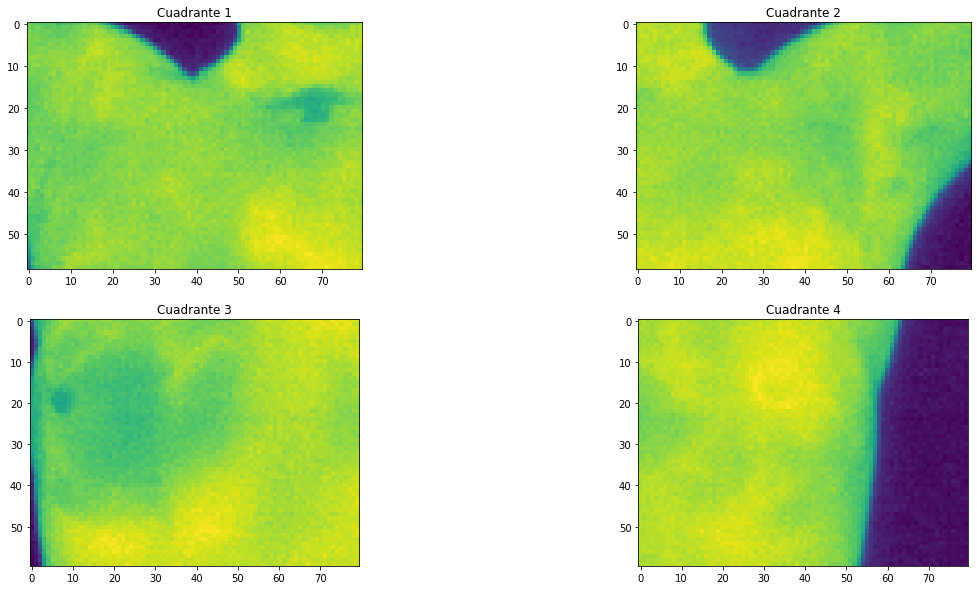

In [259]:
fig, axs = plt.subplots(2,2, figsize = (20,10))
contador_cuadrante = 0

for columna, cuadran, numero in zip([0,1], [c1,c2], [1,2]):
    axs[0, columna].imshow(cuadran)
    axs[0, columna].set_title(f'Cuadrante {numero}')

for columna, cuadran, numero in zip([0,1], [c3,c4], [3,4]):
    axs[1, columna].imshow(cuadran)
    axs[1, columna].set_title(f'Cuadrante {numero}')

1.B)

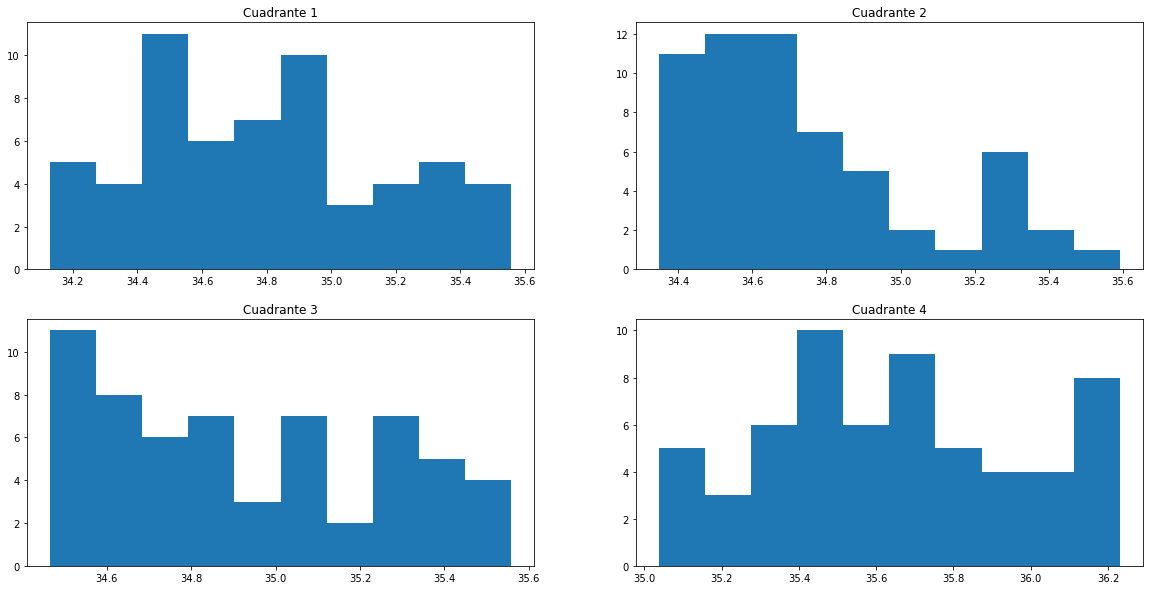

In [260]:
fig, axs = plt.subplots(2,2, figsize = (20,10))
contador_cuadrante = 0

for columna, cuadran, numero in zip([0,1], [c1,c2], [1,2]):
    axs[0, columna].hist(np.amax(cuadran, 1))
    axs[0, columna].set_title(f'Cuadrante {numero}')

for columna, cuadran, numero in zip([0,1], [c3,c4], [3,4]):
    axs[1, columna].hist(np.amax(cuadran, 1))
    axs[1, columna].set_title(f'Cuadrante {numero}')

1.C)

In [261]:
def getSlice(imagen, filas):
    return imagen[filas[0]:filas[1],:]

In [262]:
feta = getSlice(matriz, [40, 100])
feta

array([[33.62443542, 33.43948364, 32.93501282, ..., 26.02387238,
        25.78844452, 25.78844452],
       [33.45629883, 33.43948364, 33.1872406 , ..., 26.22564697,
        25.36806488, 25.48577118],
       [33.20405579, 33.10316467, 32.98545837, ..., 25.55303955,
        25.55303955, 25.43532562],
       ...,
       [27.36909485, 30.4967804 , 32.17831421, ..., 25.16627502,
        25.40169525, 25.21672821],
       [27.43637085, 30.98442078, 31.7747345 , ..., 25.31761169,
        25.13265228, 24.82996368],
       [26.67967224, 30.69856262, 31.85882568, ..., 25.36806488,
        25.09902191, 24.93086243]])

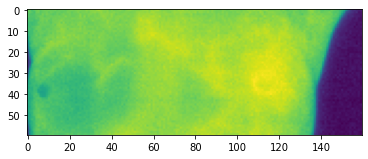

In [263]:
plt.imshow(feta)

1.D)

In [264]:
feta2 = getSlice(matriz, [60,90])
feta2

array([[27.67176819, 31.35437012, 32.02697754, ..., 24.98130035,
        25.16627502, 25.04856873],
       [27.28503418, 30.74900818, 32.17831421, ..., 25.36806488,
        25.36806488, 25.16627502],
       [26.8478241 , 30.0091095 , 31.7243042 , ..., 25.31761169,
        25.63710785, 25.45214081],
       ...,
       [31.55615234, 31.94290161, 32.34648132, ..., 25.28398895,
        25.18309784, 25.06539154],
       [31.64022827, 32.17831421, 32.51463318, ..., 25.18309784,
        25.40169525, 25.04856873],
       [31.35437012, 32.01016235, 32.36329651, ..., 24.94766998,
        25.21672821, 25.43532562]])

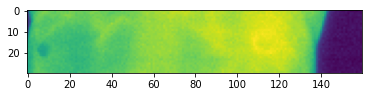

In [265]:
plt.imshow(feta2)

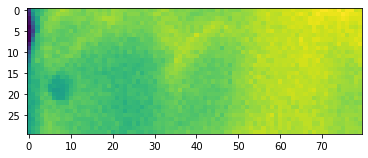

In [266]:
mama_izquierda = feta2[:,:feta2.shape[1]//2]
plt.imshow(mama_izquierda)

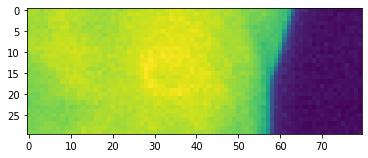

In [267]:
mama_derecha = feta2[:,feta2.shape[1]//2:]
plt.imshow(mama_derecha)

In [268]:
media_izquierda = np.mean(mama_izquierda[mama_izquierda > 30])
media_izquierda

33.53804021235829

In [269]:
media_derecha = np.mean(mama_derecha[mama_derecha > 30])
media_derecha

34.74732488976186

In [270]:
print(f'La diferencia de temperatura media es de {media_derecha-media_izquierda: .2f} °C a favor de la mama derecha.')

La diferencia de temperatura media es de  1.21 °C a favor de la mama derecha.


### Ejercicio 2)

In [271]:
enfermedades_card = pd.read_csv("files/heart.csv")
enfermedades_card

,edad,sexo,dolorPecho,presRest,nivelCol,glucA,restecg,maxHR,ejang,blanco
0,52,1,0,125,212,0,1,168,0,0
1,53,1,0,140,203,1,0,155,1,0
2,70,1,0,145,174,0,1,125,1,0
3,61,1,0,148,203,0,1,161,0,0
4,62,0,0,138,294,1,1,106,0,0
...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,1
1021,60,1,0,125,258,0,0,141,1,0
1022,47,1,0,110,275,0,0,118,1,0
1023,50,0,0,110,254,0,0,159,0,1


2.1)

In [272]:
media_edad_blancos = enfermedades_card.groupby('blanco')['edad'].mean()
media_edad_blancos

blanco
0    56.569138
1    52.408745
Name: edad, dtype: float64

In [273]:
media_edad_noC = media_edad_blancos[0]
media_edad_noC

56.569138276553105

In [274]:
media_edad_C = media_edad_blancos[1]
media_edad_C

52.40874524714829

In [275]:
desv_edad_blancos = enfermedades_card.groupby('blanco')['edad'].std()
desv_edad_blancos

blanco
0    7.908153
1    9.631804
Name: edad, dtype: float64

In [276]:
desv_edad_noC = desv_edad_blancos[0]
desv_edad_noC

7.908153071287477

In [277]:
desv_edad_C = desv_edad_blancos[1]
desv_edad_C

9.631804436776676

2.2)

In [278]:
max_col = enfermedades_card.groupby('blanco')['nivelCol'].max()
max_col

blanco
0    409
1    564
Name: nivelCol, dtype: int64

In [279]:
max_col_noC = max_col.values[0]
max_col_noC

409

In [280]:
max_col_C = max_col.values[1]
max_col_C

564

In [281]:
min_col = enfermedades_card.groupby('blanco')['nivelCol'].min()
min_col

blanco
0    131
1    126
Name: nivelCol, dtype: int64

In [282]:
min_col_noC = min_col.values[0]
min_col_noC

131

In [283]:
min_col_C = min_col.values[1]
min_col_C

126

2.3)

In [284]:
pre_diabeticas = enfermedades_card['glucA'].value_counts()
pre_diabeticas

0    872
1    153
Name: glucA, dtype: int64

In [285]:
print(f'La cantidad de personas pre diabéticas es de {pre_diabeticas.values[1]}')

La cantidad de personas pre diabéticas es de 153


2b.1)

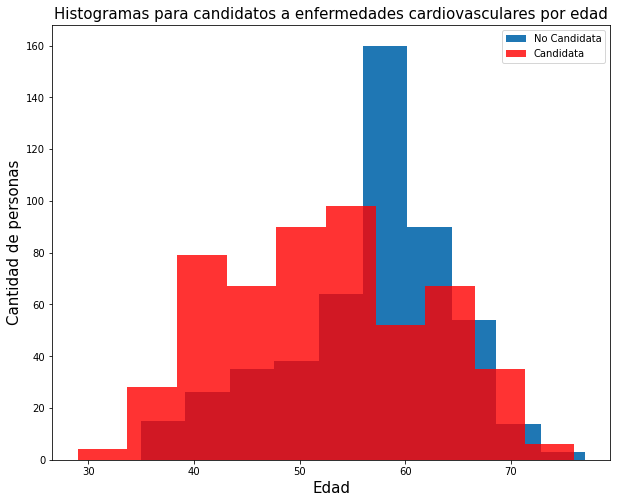

In [286]:
fig, axs = plt.subplots(figsize = (10,8))

axs.hist(enfermedades_card[enfermedades_card['blanco'] == 0]['edad'].values, alpha = 1, label = 'No Candidata')
axs.hist(enfermedades_card[enfermedades_card['blanco'] == 1]['edad'].values, alpha = 0.8, label = 'Candidata', color = 'r')
axs.set_xlabel('Edad', fontsize = 15)
axs.set_ylabel('Cantidad de personas', fontsize = 15)
axs.set_title('Histogramas para candidatos a enfermedades cardiovasculares por edad', fontsize = 15)
axs.legend()

plt.show()

2b.2)

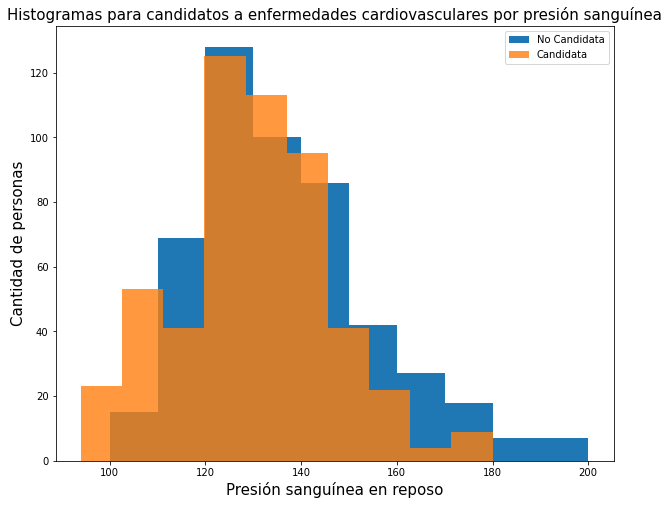

In [287]:
fig, axs = plt.subplots(figsize = (10,8))

axs.hist(enfermedades_card[enfermedades_card['blanco'] == 0]['presRest'].values, alpha = 1, label = 'No Candidata')
axs.hist(enfermedades_card[enfermedades_card['blanco'] == 1]['presRest'].values, alpha = 0.8, label = 'Candidata')
axs.set_xlabel('Presión sanguínea en reposo', fontsize = 15)
axs.set_ylabel('Cantidad de personas', fontsize = 15)
axs.set_title('Histogramas para candidatos a enfermedades cardiovasculares por presión sanguínea', fontsize = 15)
axs.legend()

plt.show()

2b.3)

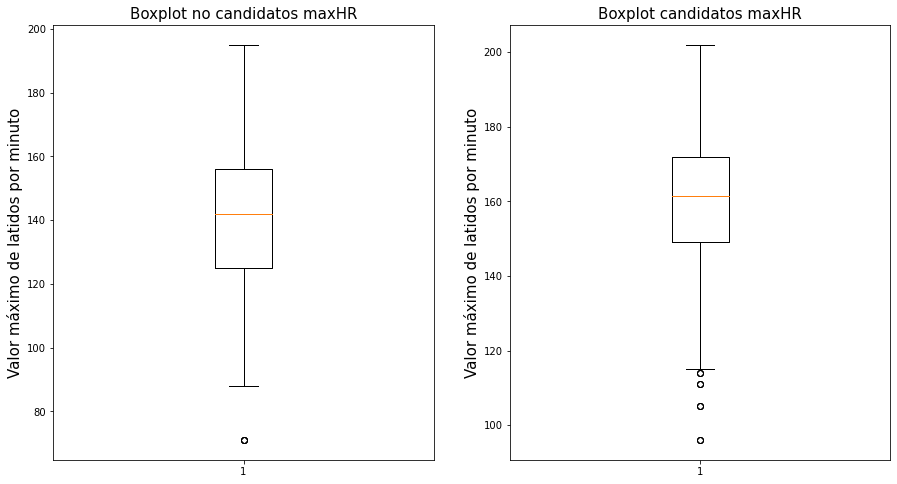

In [288]:
fig, axs = plt.subplots(1, 2, figsize = (15,8))

axs[0].boxplot(enfermedades_card[enfermedades_card['blanco'] == 0]['maxHR'].values)
axs[1].boxplot(enfermedades_card[enfermedades_card['blanco'] == 1]['maxHR'].values)
axs[0].set_ylabel('Valor máximo de latidos por minuto', fontsize = 15)
axs[0].set_title('Boxplot no candidatos maxHR', fontsize = 15)
axs[1].set_ylabel('Valor máximo de latidos por minuto', fontsize = 15)
axs[1].set_title('Boxplot candidatos maxHR', fontsize = 15)


plt.show()

### Ejercicio 3)

In [290]:
covid = pd.read_csv("files/covid.csv")
covid['date'] = pd.to_datetime(covid.date, format = '%Y-%m-%d')
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


3a)

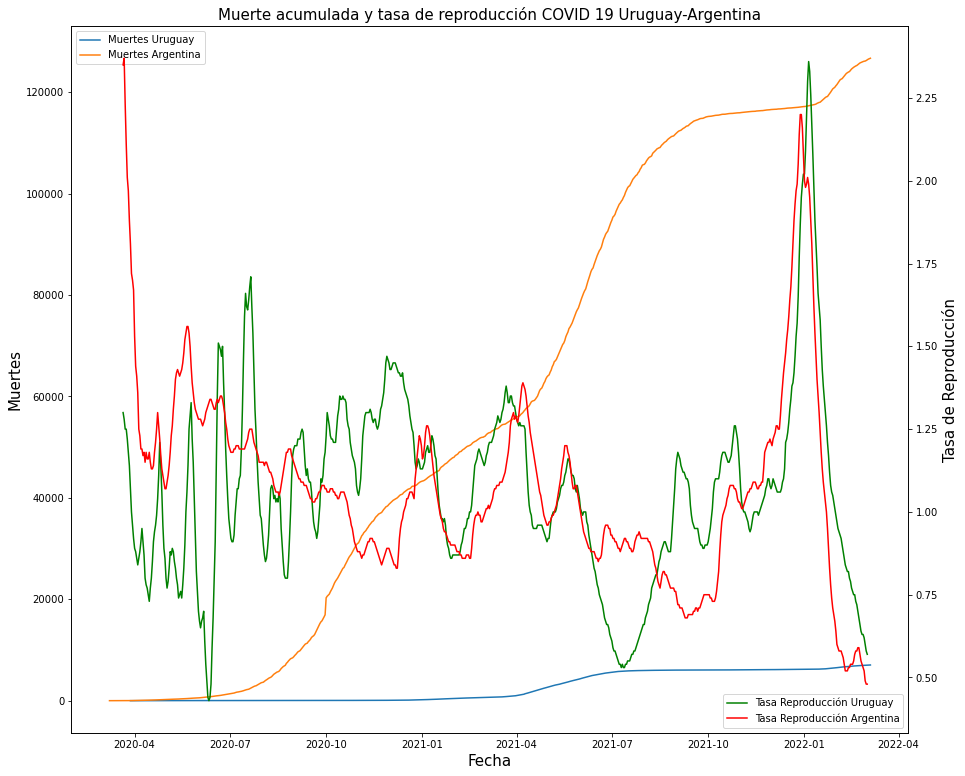

In [291]:
fig, axs = plt.subplots(figsize = (15,13))

axs.plot(covid[covid['location'] == 'Uruguay']['date'].values, covid[covid['location'] == 'Uruguay']['total_deaths'].values, label = 'Muertes Uruguay')
axs.plot(covid[covid['location'] == 'Argentina']['date'].values, covid[covid['location'] == 'Argentina']['total_deaths'].values, label = 'Muertes Argentina')
axs.set_xlabel('Fecha', fontsize = 15)
axs.set_ylabel('Muertes', fontsize = 15)
axs.set_title('Muerte acumulada y tasa de reproducción COVID 19 Uruguay-Argentina', fontsize = 15)
axs.legend()

axs2 = axs.twinx() ## copiamos el eje X del objeto ax creado previamente y lo asignamos a un nuevo objeto Axes
axs2.plot(covid[covid['location'] == 'Uruguay']['date'].values, covid[covid['location'] == 'Uruguay']['reproduction_rate'].values, label = 'Tasa Reproducción Uruguay', color = 'g')
axs2.plot(covid[covid['location'] == 'Argentina']['date'].values, covid[covid['location'] == 'Argentina']['reproduction_rate'].values, label = 'Tasa Reproducción Argentina', color = 'r')
axs2.set_ylabel('Tasa de Reproducción', fontsize = 15)
axs2.legend()

plt.show()

3b)

In [292]:
covid['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [293]:
sud_america_covid = covid[covid['continent'] == 'South America'].set_index('date')
sud_america_covid

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2020-01-02,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2020-01-03,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2020-01-04,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2020-01-05,ARG,South America,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,VEN,South America,Venezuela,515124.0,0.0,478.857,5636.0,0.0,2.857,17945.478,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
2022-03-02,VEN,South America,Venezuela,515582.0,458.0,431.714,5639.0,3.0,2.143,17961.434,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
2022-03-03,VEN,South America,Venezuela,515943.0,361.0,428.000,5643.0,4.0,2.571,17974.010,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN


In [294]:
filtro_fecha_csa = sud_america_covid.loc['2021':'2022']
filtro_fecha_csa

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,ARG,South America,Argentina,1629594.0,4080.0,7862.857,43319.0,74.0,128.143,35732.148,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2021-01-02,ARG,South America,Argentina,1634834.0,5240.0,8081.000,43375.0,56.0,124.857,35847.045,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2021-01-03,ARG,South America,Argentina,1640718.0,5884.0,8203.000,43482.0,107.0,118.857,35976.064,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2021-01-04,ARG,South America,Argentina,1648940.0,8222.0,8346.714,43634.0,152.0,109.429,36156.348,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2021-01-05,ARG,South America,Argentina,1662730.0,13790.0,8652.429,43785.0,151.0,109.571,36458.722,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,VEN,South America,Venezuela,515124.0,0.0,478.857,5636.0,0.0,2.857,17945.478,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
2022-03-02,VEN,South America,Venezuela,515582.0,458.0,431.714,5639.0,3.0,2.143,17961.434,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
2022-03-03,VEN,South America,Venezuela,515943.0,361.0,428.000,5643.0,4.0,2.571,17974.010,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN


In [295]:
paises = filtro_fecha_csa['location'].unique()
paises

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Falkland Islands', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
       'Uruguay', 'Venezuela'], dtype=object)

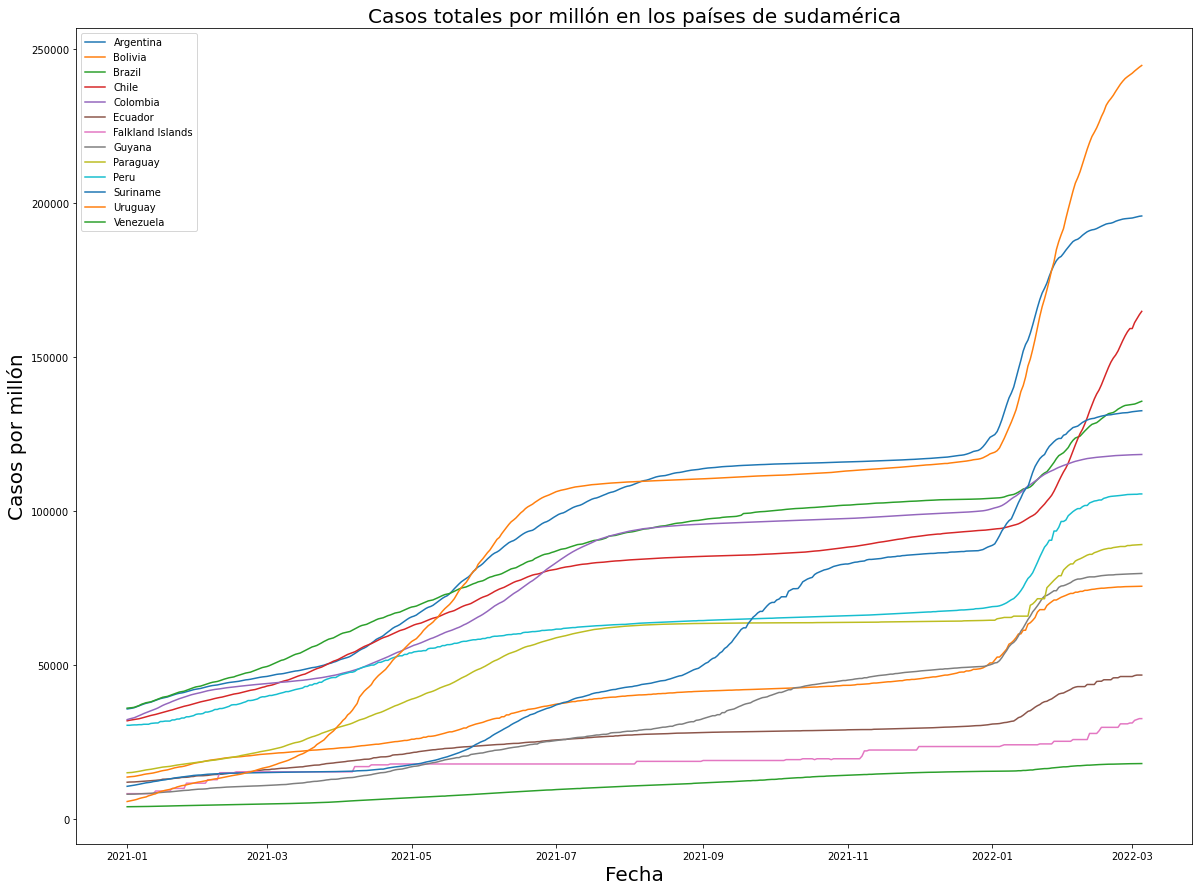

In [296]:
fig, axs = plt.subplots(figsize = (20,15))

for pais in paises:
    axs.plot(filtro_fecha_csa[filtro_fecha_csa['location'] == pais]['total_cases_per_million'].index,
             filtro_fecha_csa[filtro_fecha_csa['location'] == pais]['total_cases_per_million'].values, label = pais)

axs.set_title('Casos totales por millón en los países de sudamérica', fontsize = 20)
axs.set_xlabel('Fecha', fontsize = 20)
axs.set_ylabel('Casos por millón', fontsize = 20)
axs.legend()